In [30]:
# import needed libraries :
import numpy as np
import matplotlib.pyplot as plt

1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [31]:
m = np.arange(12).reshape((3,4))
#Total mean :
#first method --> using np.mean method :
t_mean = np.mean(m)
#second method --> for loop : 
t_mean = 0
for ii in range(np.shape(m)[0]):
    t_mean += np.sum(m[ii, :])
t_mean = t_mean / ((np.shape(m)[0]) * (np.shape(m)[1]))
print('Total mean of m : ', t_mean, '\n')

#mean for each row :
r_mean = np.zeros(np.shape(m)[0])
for ii in range(len(r_mean)):
    r_mean[ii] = np.mean(m[ii, :])
for ii in range(len(r_mean)):
    print('mean for row', ii+1, 'is: ', r_mean[ii])
print('\n')    

#mean for each column :
c_mean = np.zeros(np.shape(m)[1])
for ii in range(len(c_mean)):
    c_mean[ii] = np.mean(m[:, ii])
for ii in range(len(c_mean)):
    print('mean for column', ii+1, 'is: ', c_mean[ii])
    

Total mean of m :  5.5 

mean for row 1 is:  1.5
mean for row 2 is:  5.5
mean for row 3 is:  9.5


mean for column 1 is:  4.0
mean for column 2 is:  5.0
mean for column 3 is:  6.0
mean for column 4 is:  7.0


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [32]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

#Using the function outer in numpy :
result_outer = np.outer(u, v)
print('Using the function outer in numpy, outer product of ', u, 'and', v, 'is: \n', result_outer)

#Using a nested for loop or a list comprehension :
result_list = np.array([ i*j for i in u for j in v ] ).reshape(len(u),len(v))  
print('Using a list comprehension, outer product of ', u, 'and', v, 'is: \n', result_list)

#Using numpy broadcasting operations :
x = np.zeros((len(u),len(v))) + u
result_broadcasting = x.T * v
print('Using a list comprehension, outer product of ', u, 'and', v, 'is: \n', result_broadcasting)


Using the function outer in numpy, outer product of  [1 3 5 7] and [2 4 6 8] is: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Using a list comprehension, outer product of  [1 3 5 7] and [2 4 6 8] is: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Using a list comprehension, outer product of  [1 3 5 7] and [2 4 6 8] is: 
 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [33]:
# 10*6 matrix, filled by float random numbers between 0 and 3 according to a uniform distribution :
mat = np.random.uniform(0,3, size=(10,6))
print('original matrix : \n', mat)

# set all entries  <0.3  to zero
mask = (mat < 0.3)
print('\nmask : \n', mask)
mat[mask] = 0

print('\nafter set all entries  <0.3  to zero using mask : \n', mat)

original matrix : 
 [[0.62798529 0.88120527 0.16715365 2.05127247 0.70136266 1.76184687]
 [0.06854072 2.0231856  2.31734906 2.87890632 1.34745423 2.51729572]
 [2.41777358 2.30794634 0.08182565 1.45119434 1.74507645 2.00244942]
 [2.99218057 2.54071321 1.44665522 0.17137718 2.92710359 2.93843492]
 [1.96338034 1.54738131 2.31059909 1.65592848 2.39935497 0.38033953]
 [1.66417203 1.37721819 1.77655709 0.08681208 0.90734864 1.76062727]
 [2.95995076 1.18381464 0.80134674 2.37221203 0.93986665 2.44638573]
 [2.68271899 2.16342431 0.48742168 0.42479193 2.37340861 2.0524491 ]
 [1.06150563 0.24458874 0.82981145 0.21944754 2.16927143 0.60223155]
 [1.1055758  2.92556113 1.05571884 2.82001714 2.65606351 0.93971085]]

mask : 
 [[False False  True False False False]
 [ True False False False False False]
 [False False  True False False False]
 [False False False  True False False]
 [False False False False False False]
 [False False False  True False False]
 [False False False False False False]
 [Fals

 4. Trigonometric functions

Use np.linspace to create an array of 100 numbers between
and

(inclusive).

    Extract every 10th element using the slice notation
    Reverse the array using the slice notation
    Extract elements where the absolute difference between the sin and cos functions evaluated for that element is 

Optional: make a plot showing the sin and cos functions and indicate where they are close

original array :
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5

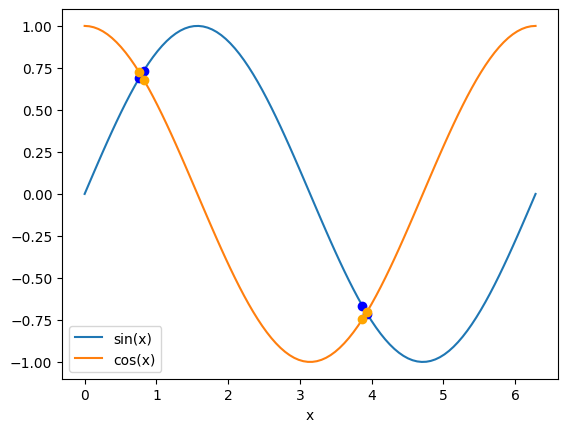

In [34]:
arr = np.linspace(0, 2*np.pi, 100, True)
print('original array :\n', arr)
#Extract every 10th element using the slice notation :
elements_10ths = arr[9::10]
print('\nevery 10th element :\n', elements_10ths)
#Reverse the array using the slice notation :
reverse = arr[::-1] 
print('\nreverse of the array :\n', reverse)
#elements where the absolute difference between the sin and cos functions evaluated for that element is <0.1 :
dif_sin_cos = arr[ abs(np.sin(arr) - np.cos(arr)) < 0.1 ]
print('\nelements with sin-cos <0.1 :\n', dif_sin_cos)
# plot showing the sin and cos functions and indicate where they are close :
plt.plot(arr, np.sin(arr), label='sin(x)')
plt.plot(arr, np.cos(arr), label='cos(x)')
plt.plot(dif_sin_cos, np.sin(dif_sin_cos), 'o', color='blue')
plt.plot(dif_sin_cos, np.cos(dif_sin_cos), 'o', color='orange')
plt.xlabel('x')
plt.legend()
plt.show()


5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [35]:
#matrix that shows the 10 by 10 multiplication table :
x = np.arange(1, 11)
mat = np.outer(x,x)
print('matrix that shows the 10 by 10 multiplication table :\n', mat)
#Trace :
trace = np.trace(mat)
print('\nTrace :\n', trace)
#anti diagonal array :
anti_d = np.fliplr(mat).diagonal()
print('\nanti diagonal elements :\n', anti_d)
#diagonal elements by 1 upwards :
up_d = mat.diagonal(offset = 1)
print('\ndiagonal elements by 1 upwards :\n', up_d)

matrix that shows the 10 by 10 multiplication table :
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Trace :
 385

anti diagonal elements :
 [10 18 24 28 30 30 28 24 18 10]

diagonal elements by 1 upwards :
 [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [36]:
pos_row = [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
pos_col = np.transpose([pos_row])
# 2D grid of distances among each city along Route 66 :
grid = abs(pos_row - pos_col)
print('2D grid to illustrate distance amonge different positions :\n', grid)
# Convert the distances in km :
# each mile = 1.6 km,
print('\nDistance in km :\n', grid*1.6)

2D grid to illustrate distance amonge different positions :
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

Distance in km :
 [[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8  216.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [1880.  1563.2 1395.2  

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


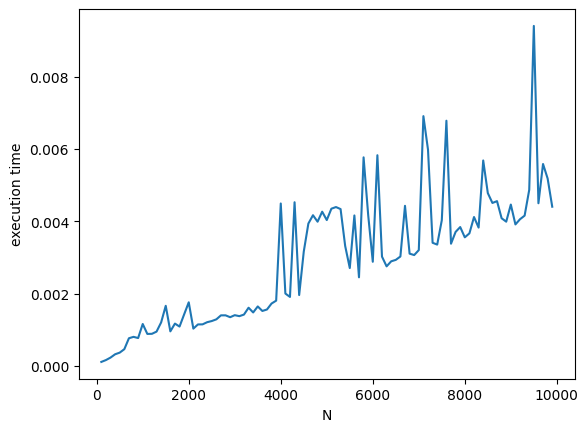

62.8 µs ± 8.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
59.6 µs ± 7.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
def sieve(n):
    mask = np.ones(n, dtype=bool)
    mask[0] = False
    for ii in range(2,n):
        mask[2*ii-1::ii] = False
    return np.arange(1,n+1)[mask]

n = 100
print(sieve(n))
# scaling with time :
import time
Ns = []
exe_time = []
for N in range(100, 10000, 100):  
    start = time.perf_counter()
    prime_numbers = sieve(N)
    stop = time.perf_counter()
    t = stop - start
    Ns.append(N)
    exe_time.append(t)

# plotting data
plt.plot(Ns, exe_time)
plt.xlabel('N')
plt.ylabel('execution time')
plt.show()


%timeit sieve(n)
#optimization :
def optimized_sieve(n): 
    x = np.ones(n, dtype=bool)
    x[0] = False
    for ii in range(2, round(np.sqrt(n))):
        if x[ii-1]:
            x[((ii*ii)-1):n:ii] = False
    return np.arange(1,n+1)[x]
%timeit sieve(n)
%timeit optimized_sieve(n)


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

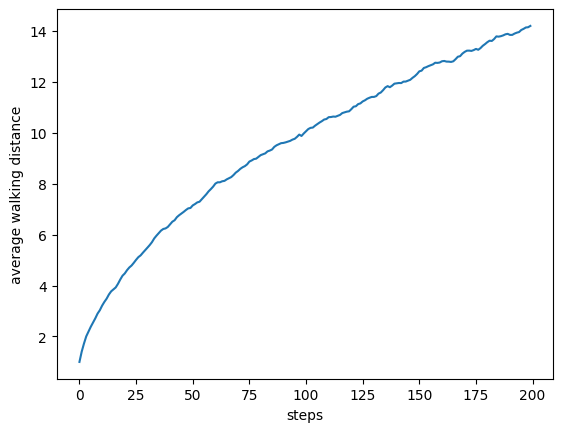

In [38]:
import numpy.random as npr

npr.seed(123)
walkers = 1000
steps = 200
a = npr.randint(0,2,size=(walkers,steps))
a[ a == 0] = -1

d = np.zeros((walkers, steps))
for i in range(walkers):
    for j in range(steps):
        if (j==0):
            d[i][j] = a[i][j]
        else:
            d[i][j] = a[i][j] + d[i][j-1]


d_2 = np.power(d,2)
m = np.mean(d_2,axis=0)
plt.plot( np.sqrt(m))
plt.xlabel('steps')
plt.ylabel('average walking distance')
plt.show()